## Gathering Data

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_tweet = pd.read_csv("twitter-archive-enhanced.csv")
df_tweet.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)

In [4]:
with open('image_predictions.tsv', mode='wb') as f:
    f.write(r.content)

In [5]:
df_img = pd.read_csv("image_predictions.tsv", sep = "\t")
df_img.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [7]:
tweet_ids = df_tweet.tweet_id.values
count = 0
fails_dict = {}
start = timer()

with open('tweet_json.txt', 'w', encoding='utf8') as file:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')._json
            print("Success")
            data = f'{tweet_id} {tweet.get("favorite_count")} {tweet.get("retweet_count")} {tweet.get("retweeted_status")} \n'
            file.write(data)
        except tweepy.TweepyException as a:
            print(a)
            print("Fail")
            fails_dict[tweet_id] = a
            pass
end = timer()
print(end - start)

'tweet_ids = df_tweet.tweet_id.values\ncount = 0\nfails_dict = {}\nstart = timer()\n\nwith open(\'tweet_json.txt\', \'w\', encoding=\'utf8\') as file:\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, tweet_mode=\'extended\')._json\n            print("Success")\n            data = f\'{tweet_id} {tweet.get("favorite_count")} {tweet.get("retweet_count")} {tweet.get("retweeted_status")} \n\'\n            file.write(data)\n        except tweepy.TweepyException as a:\n            print(a)\n            print("Fail")\n            fails_dict[tweet_id] = a\n            pass\nend = timer()\nprint(end - start)'

In [8]:
col_names = ["tweet_id", "favorite_count", "retweet_count", "retweeted_status"]
df_data = pd.read_csv("tweet_json.txt", sep = " ", names=col_names,header = None, index_col= False)

## Assessing Data

#### *Visual Assessment*

In [9]:
df_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [11]:
df_data

,tweet_id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,33728,6979,None
1,892177421306343426,29255,5280,None
2,891815181378084864,21988,3466,None
3,891689557279858688,36819,7200,None
4,891327558926688256,35213,7722,None
...,...,...,...,...
2322,666049248165822465,88,36,None
2323,666044226329800704,246,115,None
2324,666033412701032449,100,36,None
2325,666029285002620928,112,39,None


#### *Programmatic Assessment*

In [12]:
df_data.head()

,tweet_id,favorite_count,retweet_count,retweeted_status
0,892420643555336193,33728,6979,None
1,892177421306343426,29255,5280,None
2,891815181378084864,21988,3466,None
3,891689557279858688,36819,7200,None
4,891327558926688256,35213,7722,None


In [13]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   int64 
 1   favorite_count    2327 non-null   int64 
 2   retweet_count     2327 non-null   int64 
 3   retweeted_status  2327 non-null   object
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [14]:
df_data.sample(5)

,tweet_id,favorite_count,retweet_count,retweeted_status
1186,715200624753819648,4748,1682,None
164,858860390427611136,0,7062,{'created_at':
85,875747767867523072,22049,3572,None
866,759446261539934208,1562,453,None
1202,713411074226274305,4094,1184,None


In [15]:
df_data.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7034.006876,2461.477009
std,6.820795e+16,10930.602169,4168.915753
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1220.500000,492.500000
50%,7.178418e+17,3041.000000,1147.000000
75%,7.986547e+17,8574.000000,2847.500000
max,8.924206e+17,144412.000000,70435.000000


In [16]:
df_data[df_data.favorite_count == df_data.favorite_count.min()]

,tweet_id,favorite_count,retweet_count,retweeted_status
31,886054160059072513,0,93,{'created_at':
35,885311592912609280,0,15387,{'created_at':
67,879130579576475649,0,5716,{'created_at':
72,878404777348136964,0,1074,{'created_at':
73,878316110768087041,0,5508,{'created_at':
...,...,...,...,...
995,746521445350707200,0,898,{'created_at':
1015,743835915802583040,0,1862,{'created_at':
1214,711998809858043904,0,121,{'created_at':
2230,667550904950915073,0,28,{'created_at':


In [17]:
df_data[(df_data.retweeted_status != "None") & (df_data.favorite_count == df_data.favorite_count.min())]

,tweet_id,favorite_count,retweet_count,retweeted_status
31,886054160059072513,0,93,{'created_at':
35,885311592912609280,0,15387,{'created_at':
67,879130579576475649,0,5716,{'created_at':
72,878404777348136964,0,1074,{'created_at':
73,878316110768087041,0,5508,{'created_at':
...,...,...,...,...
995,746521445350707200,0,898,{'created_at':
1015,743835915802583040,0,1862,{'created_at':
1214,711998809858043904,0,121,{'created_at':
2230,667550904950915073,0,28,{'created_at':


In [18]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
df_img.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [22]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
df_tweet.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1138,728035342121635841,NaN,NaN,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728035342...,12,10,all,None,None,pupper,None
1550,689154315265683456,NaN,NaN,2016-01-18 18:36:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We normally don't rate birds but I feel bad co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689154315...,9,10,None,None,None,None,None
365,829011960981237760,NaN,NaN,2017-02-07 17:00:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dexter. He was reunited with his mom y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/829011960...,13,10,Dexter,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Crazy unseen footage from Jurassic Park. 10/10...,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None


In [24]:
df_tweet[df_tweet.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [25]:
df_tweet.loc[30, "text"]

'@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution'

In [26]:
df_tweet.text[0].find("http")

86

In [27]:
df_tweet.text[30].find("http")

-1

In [28]:
df_tweet.name.value_counts().head(50)

None       745
a           55
Charlie     12
Oliver      11
Cooper      11
Lucy        11
Tucker      10
Lola        10
Penny       10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
Daisy        7
Bailey       7
an           7
Buddy        7
Bella        6
Stanley      6
Dave         6
Rusty        6
Milo         6
Oscar        6
Jack         6
Scout        6
Jax          6
Koda         6
Leo          6
Louis        5
Sunny        5
Chester      5
Gus          5
Bentley      5
Phil         5
Larry        5
Oakley       5
Sammy        5
George       5
very         5
Finn         5
Alfie        5
Archie       4
one          4
Bear         4
Beau         4
Scooter      4
Maddie       4
Bruce        4
Carl         4
Name: name, dtype: int64

In [29]:
df_tweet.name.sort_values()

1035     Abby
1021     Abby
938       Ace
1933     Acro
1327    Adele
        ...  
1031     very
773      very
1097     very
819      very
1385     very
Name: name, Length: 2356, dtype: object

In [30]:
df_tweet[df_tweet.name == "very"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770655142...,11,10,very,None,None,None,None
1031,745422732645535745,NaN,NaN,2016-06-22 01:06:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/745422732...,9,10,very,None,None,None,None
1097,736225175608430592,NaN,NaN,2016-05-27 15:58:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/736225175...,10,10,very,None,None,None,None
1385,700747788515020802,NaN,NaN,2016-02-19 18:24:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None


In [31]:
df_tweet.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [32]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [33]:
df_tweet.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [34]:
df_tweet.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [35]:
df_tweet.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [36]:
df_tweet[df_tweet.rating_denominator == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [37]:
df_tweet[df_tweet.expanded_urls.isna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [38]:
df_tweet.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [39]:
df_tweet.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [40]:
df_tweet.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [41]:
df_tweet.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

### I will highlight the problems seen during the visual and programmatic assessment of this data.

### Quality
#### - Twitter archive table

1. Delete retweets, leave only original ratings.
2. Fix datatypes of columns.
3. Correct numerators with decimals
4. Some rows have more than one dog stage
5. Error in dog names (e.g a,an,actually) are not a dog's name.
6. Text column includes a text and a link(and on clicking the links, they open an error page). .
7. Remove less important columns.
 
#### - Image prediction table

1. Fix datatype 

#### - Twitter API table

1. Fix datatype 
2. Remove retweets- tweets with 0 favorite_count
 
###  Tidiness

#### - Twitter archive table

1. doggo, floofer, pupper and puppo columns should be in one column
2. Merge numerator and denominator columns into one, in percentage.

#### - Twitter API table & Image Prediction table 

1. Merge twitter api table and the image pred. table to the twitter archive table

## Cleaning Data

#### Make a copy of the original data

In [42]:
df_data_copy = df_data.copy()
df_tweet_copy = df_tweet.copy()
df_img_copy = df_img.copy()

#### Define 
Remove the retweets in the df_tweet table.

#### Code

In [43]:
df_tweet_copy = df_tweet_copy[df_tweet_copy.isnull()["retweeted_status_user_id"]]

#### Test

In [44]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Define

#### Fixing  the datatypes of the columns with erroneous datatype.

In [45]:
df_tweet_copy.tweet_id = df_tweet_copy.tweet_id.astype(str)
df_tweet_copy.timestamp = pd.to_datetime(df_tweet_copy.timestamp.str.strip("+00:00"), format = "%Y-%m-%d %H:%M:%S")

In [46]:
df_img_copy.tweet_id = df_img_copy.tweet_id.astype(str)

In [47]:
df_data_copy.tweet_id = df_data_copy.tweet_id.astype(str)

#### Test

In [48]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   object        
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

In [49]:
df_img_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [50]:
df_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   object
 1   favorite_count    2327 non-null   int64 
 2   retweet_count     2327 non-null   int64 
 3   retweeted_status  2327 non-null   object
dtypes: int64(2), object(2)
memory usage: 72.8+ KB


#### Define 
Fix the incorrect values in the rating_numerical column in the df_tweet dataframe.

#### Code

In [51]:
with pd.option_context('max_colwidth', 200):
    display(df_tweet_copy[df_tweet_copy['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [52]:
correct_numerators = [13.5, 9.75, 9.75, 11.27, 9.5, 11.26]
corresponding_id = [883482846933004288, 832215909146226688, 786709082849828864, 778027034220126208, 681340665377193984, 680494726643068929]

In [53]:
for i,j in zip(correct_numerators, corresponding_id):
    df_tweet_copy.loc[(df_tweet_copy.tweet_id == j), 'rating_numerator'] = i

In [54]:
with pd.option_context('max_colwidth', 200):
    display(df_tweet_copy[df_tweet_copy['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75.0,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27.0,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.0,10


#### Define
Change the names of the dogs that are not actual names to 'None'.

#### Code

In [55]:
actual_names = []
names_to_change = []

for i in df_tweet.name.unique():
    if i[0].isupper():
        actual_names.append(i)
    else:
        names_to_change.append(i)
        
print(names_to_change)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [56]:
df_tweet_copy = df_tweet_copy.replace(names_to_change, 'None')

#### Test

In [57]:
df_tweet_copy.name.value_counts()

None        784
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Monster       1
Burt          1
Gustav        1
Tessa         1
Philippe      1
Name: name, Length: 931, dtype: int64

In [58]:
sum(df_tweet_copy.name.isin(names_to_change))

0

#### Define
Remove the hyperlinks in rows in which the text column of the df_tweet_copy df contains hyperlinks.

#### Code

In [59]:
def hyperlink(text):
    http = text.find("http")
    if http == -1:
        text = text 
    else:
        text = text[:http - 1]
    return text
    
df_tweet_copy.text = df_tweet_copy.text.apply(hyperlink)

#### Test

In [60]:
df_tweet_copy.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

#### Define
Remove the rows where the retweeted_status is not None.

#### Code

In [61]:
df_data_copy = df_data_copy[df_data_copy.retweeted_status == "None"]

#### Test

In [62]:
df_data_copy[df_data_copy.retweeted_status != "None"]

,tweet_id,favorite_count,retweet_count,retweeted_status


In [63]:
df_data_copy[df_data_copy.favorite_count == 0]

,tweet_id,favorite_count,retweet_count,retweeted_status


#### Define 
Remove columns that are not needed.

#### Code

In [64]:
df_tweet_copy = df_tweet_copy.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", "source", "expanded_urls"], axis = 1)

#### Test

In [65]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   float64       
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   doggo               2175 non-null   object        
 7   floofer             2175 non-null   object        
 8   pupper              2175 non-null   object        
 9   puppo               2175 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 251.5+ KB


#### Define
Remove retweeted_status column in df_data_copy df

#### Code

In [66]:
df_data_copy = df_data_copy.drop("retweeted_status", axis = 1)

#### Test

In [67]:
df_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2167 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2167 non-null   object
 1   favorite_count  2167 non-null   int64 
 2   retweet_count   2167 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 67.7+ KB


## Tidiness

#### Define
Replace the stages of the dogs with multiple stages with 'Multiple'.

#### Code

In [68]:
df_tweet_copy['dog_stage'] = df_tweet_copy.doggo + df_tweet_copy.floofer + df_tweet_copy.pupper + df_tweet_copy.puppo

In [69]:
df_tweet_copy.dog_stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [70]:
def check_stages(stage):
    if stage['dog_stage'].count('None') == 2:
        return 'multiple' 
    else:
        if stage['dog_stage'].count('doggo') == 1:
            return 'doggo'
        elif stage['dog_stage'].count('floofer') == 1:
            return 'floofer'
        elif stage['dog_stage'].count('pupper') == 1:
            return 'pupper'
        elif stage['dog_stage'].count('puppo') == 1:
            return 'puppo'
        else:
            return 'None'

df_tweet_copy['dog_stage'] = df_tweet_copy.apply(check_stages, axis=1)

#### Test

In [71]:
df_tweet_copy.dog_stage.value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

#### Define
Remove the unwanted dog stages columns 

#### Code

In [72]:
df_tweet_copy = df_tweet_copy.drop(["doggo", "floofer", "pupper", "puppo"], axis = 1)

#### Test

In [73]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   object        
 1   timestamp           2175 non-null   datetime64[ns]
 2   text                2175 non-null   object        
 3   rating_numerator    2175 non-null   float64       
 4   rating_denominator  2175 non-null   int64         
 5   name                2175 non-null   object        
 6   dog_stage           2175 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 200.5+ KB


#### Define
Merge the rating_numerator and rating_denominator into one column.

#### Code

In [75]:
df_tweet_copy = df_tweet_copy[(df_tweet_copy.rating_numerator != 0) & (df_tweet_copy.rating_denominator != 0)]

In [76]:
df_tweet_copy["rating_percentage"] = round(df_tweet_copy.rating_numerator / df_tweet_copy.rating_denominator * 100)

In [77]:
df_tweet_copy = df_tweet_copy.drop(["rating_numerator", "rating_denominator"], axis = 1)

In [80]:
df_tweet_copy.rating_percentage = df_tweet_copy.rating_percentage.astype(int)

#### Test

In [81]:
df_tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2355
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           2172 non-null   object        
 1   timestamp          2172 non-null   datetime64[ns]
 2   text               2172 non-null   object        
 3   name               2172 non-null   object        
 4   dog_stage          2172 non-null   object        
 5   rating_percentage  2172 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(4)
memory usage: 110.3+ KB


In [82]:
df_tweet_copy.rating_percentage.sort_values()

1446       10
2038       10
1869       10
2091       10
1940       10
        ...  
290      1820
2074     4200
188      4200
189      6660
979     17760
Name: rating_percentage, Length: 2172, dtype: int32

#### Define
Merge the three dataframes on the tweet_id column  

#### Code

In [83]:
df = pd.merge(left = df_tweet_copy, right = df_img_copy, how = "left", on = "tweet_id")
df = pd.merge(left = df, right = df_data_copy, how = "left", on = "tweet_id")

#### Test

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172 entries, 0 to 2171
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           2172 non-null   object        
 1   timestamp          2172 non-null   datetime64[ns]
 2   text               2172 non-null   object        
 3   name               2172 non-null   object        
 4   dog_stage          2172 non-null   object        
 5   rating_percentage  2172 non-null   int32         
 6   jpg_url            1992 non-null   object        
 7   img_num            1992 non-null   float64       
 8   p1                 1992 non-null   object        
 9   p1_conf            1992 non-null   float64       
 10  p1_dog             1992 non-null   object        
 11  p2                 1992 non-null   object        
 12  p2_conf            1992 non-null   float64       
 13  p2_dog             1992 non-null   object        
 14  p3      

#### Define
Drop the rows with the NaN values(tweets without pictures)

##### Code

In [85]:
df = df.dropna(axis = 0)

#### Test

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1984 entries, 0 to 2171
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           1984 non-null   object        
 1   timestamp          1984 non-null   datetime64[ns]
 2   text               1984 non-null   object        
 3   name               1984 non-null   object        
 4   dog_stage          1984 non-null   object        
 5   rating_percentage  1984 non-null   int32         
 6   jpg_url            1984 non-null   object        
 7   img_num            1984 non-null   float64       
 8   p1                 1984 non-null   object        
 9   p1_conf            1984 non-null   float64       
 10  p1_dog             1984 non-null   object        
 11  p2                 1984 non-null   object        
 12  p2_conf            1984 non-null   float64       
 13  p2_dog             1984 non-null   object        
 14  p3      

In [87]:
df.head(3)

,tweet_id,timestamp,text,name,dog_stage,rating_percentage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,130,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33728.0,6979.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,130,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29255.0,5280.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,120,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21988.0,3466.0


### Storing the master dataframe

In [88]:
df.to_csv("twitter_archive_master.csv", index = False)

### Analyzing and Visualization

In [89]:
master_df = pd.read_csv("twitter_archive_master.csv")
master_df.head()

,tweet_id,timestamp,text,name,dog_stage,rating_percentage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,Phineas,None,130,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,33728.0,6979.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,Tilly,None,130,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,29255.0,5280.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,Archie,None,120,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,21988.0,3466.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,Darla,None,130,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,36819.0,7200.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,Franklin,None,120,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,35213.0,7722.0


In [90]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           1984 non-null   int64  
 1   timestamp          1984 non-null   object 
 2   text               1984 non-null   object 
 3   name               1984 non-null   object 
 4   dog_stage          1984 non-null   object 
 5   rating_percentage  1984 non-null   int64  
 6   jpg_url            1984 non-null   object 
 7   img_num            1984 non-null   float64
 8   p1                 1984 non-null   object 
 9   p1_conf            1984 non-null   float64
 10  p1_dog             1984 non-null   bool   
 11  p2                 1984 non-null   object 
 12  p2_conf            1984 non-null   float64
 13  p2_dog             1984 non-null   bool   
 14  p3                 1984 non-null   object 
 15  p3_conf            1984 non-null   float64
 16  p3_dog             1984 

#### Importing the stored master df has reset the datatypes again. I will fix them.

In [91]:
master_df.tweet_id = master_df.tweet_id.astype(str)
master_df.dog_stage = master_df.dog_stage.astype("category")
master_df[['retweet_count', 'favorite_count']] = master_df[['retweet_count', 'favorite_count']].astype(int)
master_df.timestamp = pd.to_datetime(master_df.timestamp)

In [92]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tweet_id           1984 non-null   object        
 1   timestamp          1984 non-null   datetime64[ns]
 2   text               1984 non-null   object        
 3   name               1984 non-null   object        
 4   dog_stage          1984 non-null   category      
 5   rating_percentage  1984 non-null   int64         
 6   jpg_url            1984 non-null   object        
 7   img_num            1984 non-null   float64       
 8   p1                 1984 non-null   object        
 9   p1_conf            1984 non-null   float64       
 10  p1_dog             1984 non-null   bool          
 11  p2                 1984 non-null   object        
 12  p2_conf            1984 non-null   float64       
 13  p2_dog             1984 non-null   bool          
 14  p3      

## Visualization
- A bar chart showing the most popular names given to the dogs

## Insights
- The relationsip between the retweet count and favorite count
- The period with the highest retweet count
- The period with the highest favorite count 


## What are the most popular dog names(Top 25)?

In [94]:
top_names = master_df.name.value_counts()[1:27]

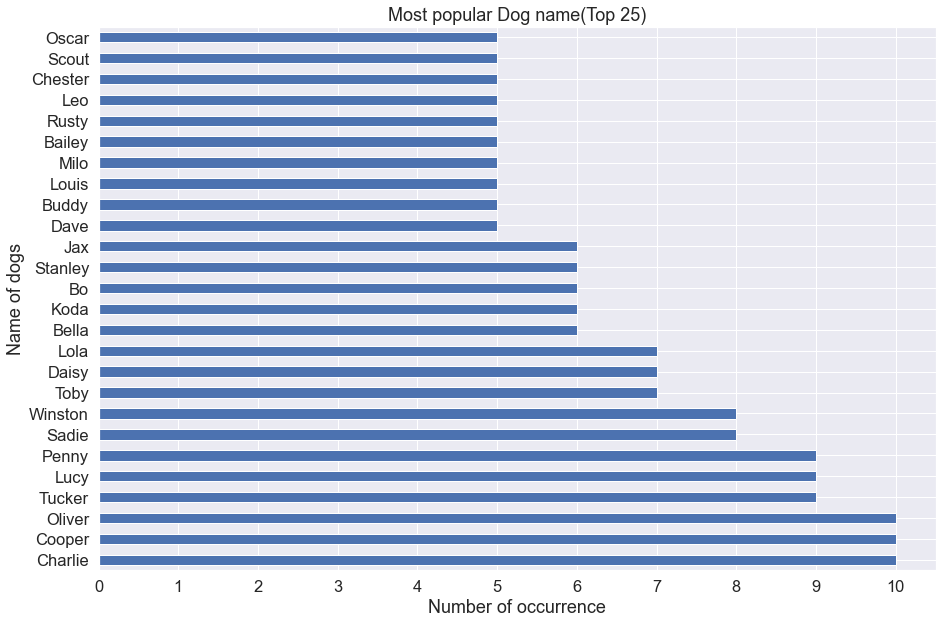

In [95]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.5)
top_names.plot.barh()

plt.title('Most popular Dog name(Top 25)')
plt.ylabel('Name of dogs')
plt.xlabel('Number of occurrence')
plt.xticks(np.arange(0, 11, 1))
plt.show()

## What is the correlation between the Favorite counts and the Retweet counts?

Text(-7.434999999999995, 0.5, 'Retweet Count')

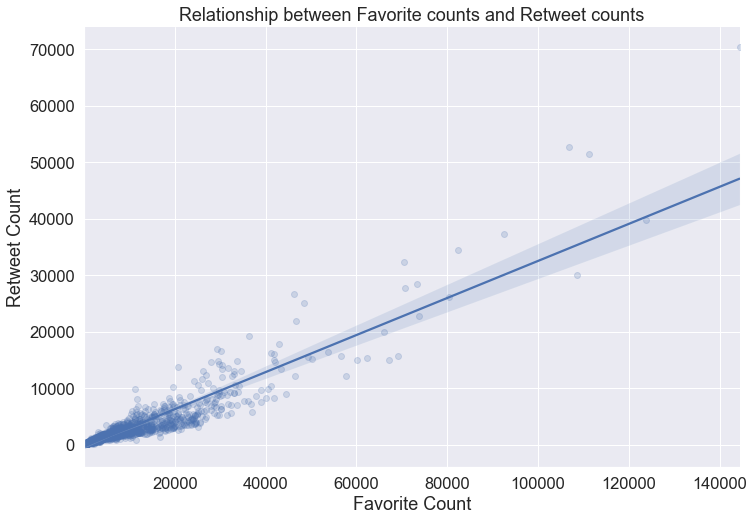

In [96]:
sns.set(rc={'figure.figsize':(15,10)}, font_scale=1.5)
sns.lmplot(x="favorite_count", y="retweet_count", data=master_df,height = 7,aspect=1.5,scatter_kws={'alpha':1/5});

plt.title('Relationship between Favorite counts and Retweet counts')
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')

#### There seems to be a positive correlation between the retweet count and the favorite count.

#### To get the specific correlation value;

In [97]:
master_df['favorite_count'].corr(master_df['retweet_count'])

0.9286331753568506

#### I can conclude that there is a very strong positive correlation between the counts.

## Which period of the years had the most retweets?

Text(0, 0.5, 'Retweet_counts')

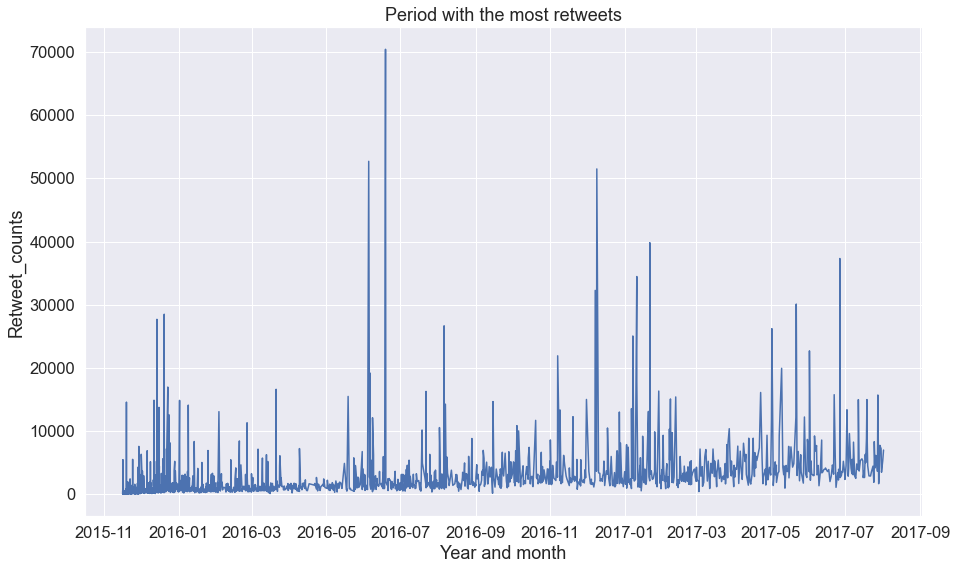

In [123]:
plt.subplots(figsize=(15, 9))
plt.plot(master_df.timestamp, master_df.retweet_count)
plt.title('Period with the most retweets')
plt.xlabel('Year and month')
plt.ylabel('Retweet_counts')

#### Sometime around June-2016, WeRateDogs had their highest retweets, over 70,000 retweets.

## Which period of the years had the most favorite counts?

Text(0, 0.5, 'Favorite_counts')

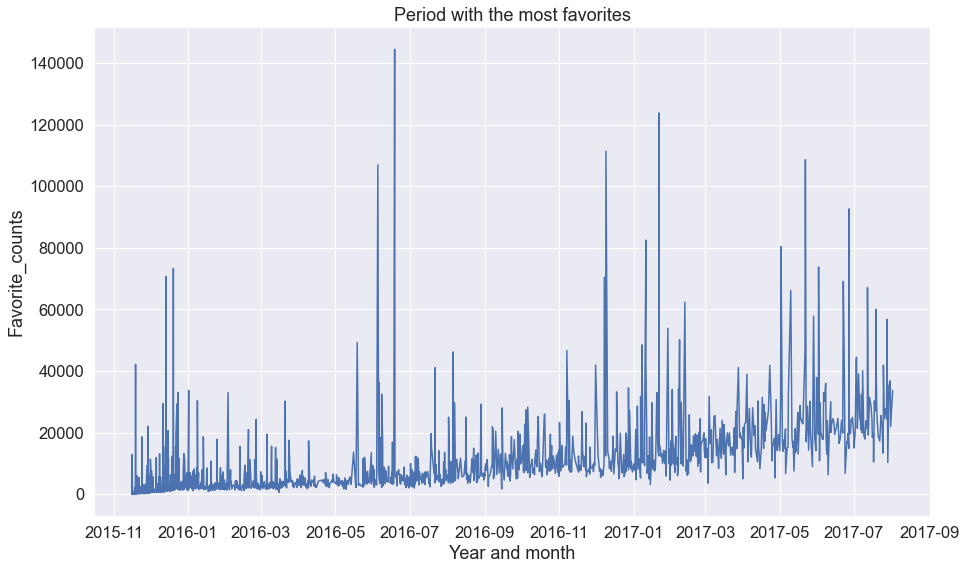

In [122]:
plt.subplots(figsize=(15, 9))
plt.plot(master_df.timestamp, master_df.favorite_count)
plt.title('Period with the most favorites')
plt.xlabel('Year and month')
plt.ylabel('Favorite_counts')

#### Following what I have etablished on the very strong positive correlation between the retweet counts and the favorite counts, we can see that the highest favorite count came the same period as the highest retweet count. Although, here we can see that there is a upward progression in the number of favorite count from March-2017.